# Titanic Worksheet Solutions

Note: I imagine there are a number of ways of completing all of these questions. This is just how I did them!

In [1]:
!wget "https://raw.githubusercontent.com/stmball/PracticalPython/main/Data%20Visualisation/titanic.csv"

--2021-11-03 13:53:11--  https://raw.githubusercontent.com/stmball/PracticalPython/main/Data%20Visualisation/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44225 (43K) [text/plain]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  43.19K  --.-KB/s    in 0.001s  

2021-11-03 13:53:11 (48.0 MB/s) - ‘titanic.csv’ saved [44225/44225]



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

titanic = pd.read_csv("./titanic.csv")

## Initial exploration

In [3]:
# Which features are recorded in the dataset?
titanic.info()

# Found in the "Column" column below.

# How many passengers are recorded?
# 887 (second row below)

# Do we have any missing data?
# No - all of the rows have 887 non-null entries.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [4]:
# What is the average age of a passenger?
titanic.describe()
# 29.47 years.

# What is the probability of a randomly selected passenger surviving?
# 0.3856 (mean survived).

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


# Kids Travel Free!

In [5]:
# What was the average fare for a child?

children = titanic[titanic["Age"] < 18]
children["Fare"].mean()

31.05782307692309

In [6]:
# What was the average fare for an adult?

adults = titanic[titanic["Age"] >= 18]
adults["Fare"].mean()


32.51967067371195

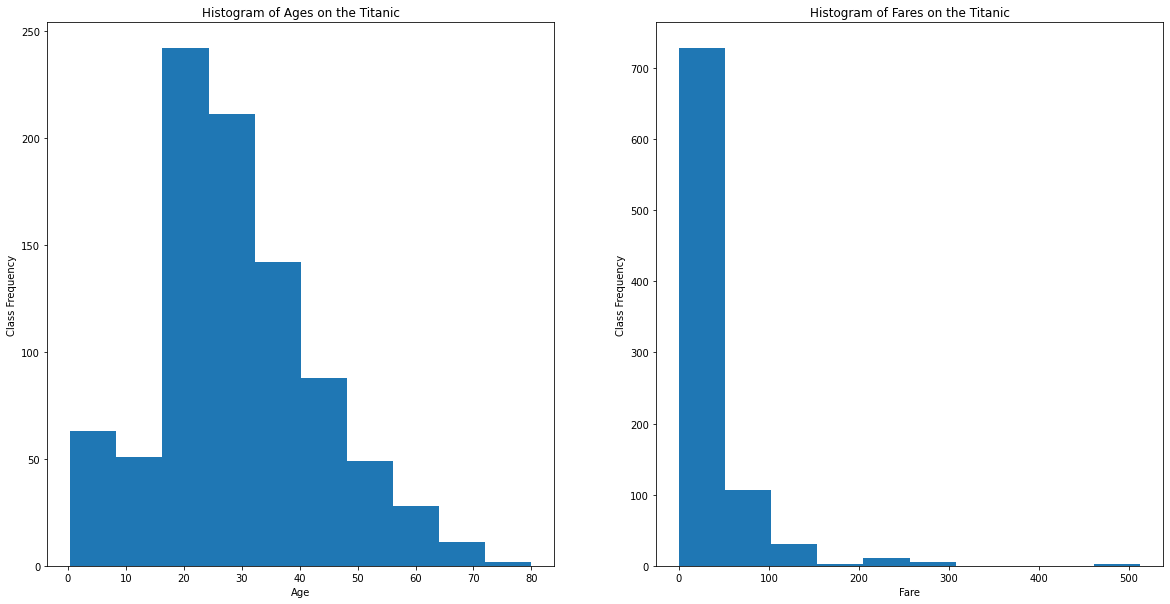

In [7]:
# Histogram of ages.
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

ax1.hist(titanic["Age"])
ax1.set_ylabel("Class Frequency")
ax1.set_xlabel("Age")
ax1.set_title("Histogram of Ages on the Titanic")

ax2.hist(titanic["Fare"])
ax2.set_ylabel("Class Frequency")
ax2.set_xlabel("Fare")
ax2.set_title("Histogram of Fares on the Titanic")

plt.show()

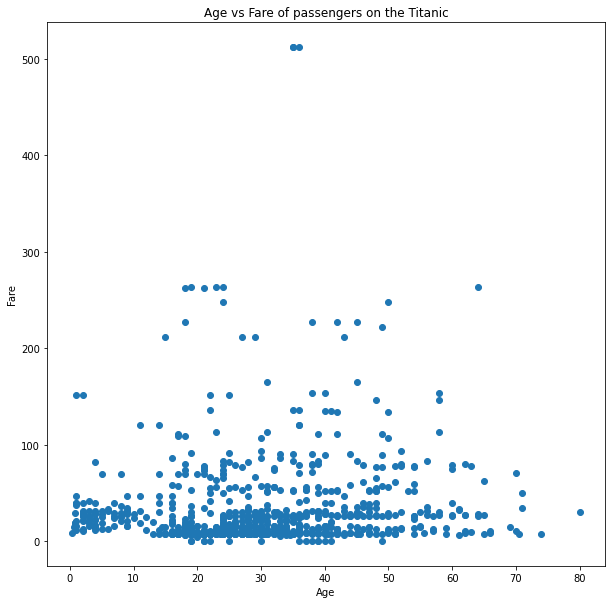

In [8]:
# Scatterplot (WITHOUT class colours) 
fig, ax = plt.subplots(figsize=(10, 10))

ax.scatter(titanic["Age"], titanic["Fare"])

ax.set_xlabel("Age")
ax.set_ylabel("Fare")
ax.set_title("Age vs Fare of passengers on the Titanic")


plt.show()

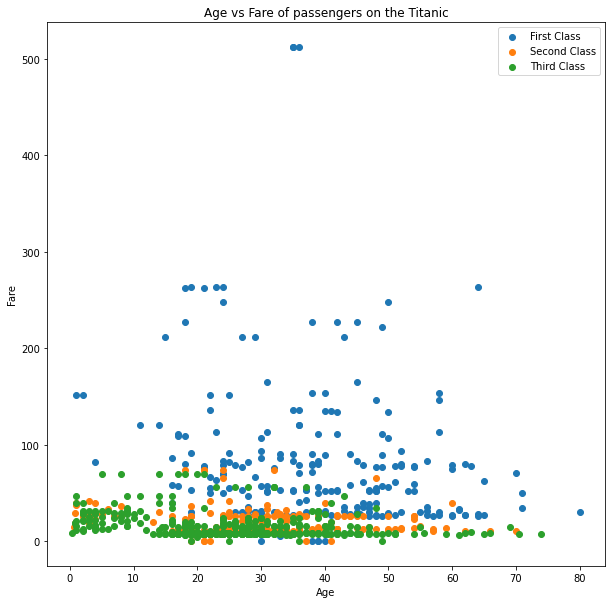

In [9]:
# Scatterplot (WITH class colours) 
fig, ax = plt.subplots(figsize=(10, 10))
classes = ["First Class", "Second Class", "Third Class"]

for i in range(3):
    subset = titanic[titanic["Pclass"] == i + 1]
    ax.scatter(subset["Age"], subset["Fare"], label=classes[i])

ax.set_xlabel("Age")
ax.set_ylabel("Fare")
ax.set_title("Age vs Fare of passengers on the Titanic")
ax.legend()


plt.show()

In [10]:
# Statistical test
stats.linregress(titanic["Age"], titanic["Fare"])

LinregressResult(slope=0.39597684566756997, intercept=20.635411117632792, rvalue=0.11232863699941621, pvalue=0.0008042532605328598, stderr=0.11774713021133451)

# You Get What You Pay For

In [12]:
# How many passenders were in each class?
titanic["Pclass"].value_counts()

3    487
1    216
2    184
Name: Pclass, dtype: int64

In [14]:
# What was the average fare paid per class?
titanic.groupby(by="Pclass").mean()["Fare"]

Pclass
1    84.154687
2    20.662183
3    13.707707
Name: Fare, dtype: float64

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


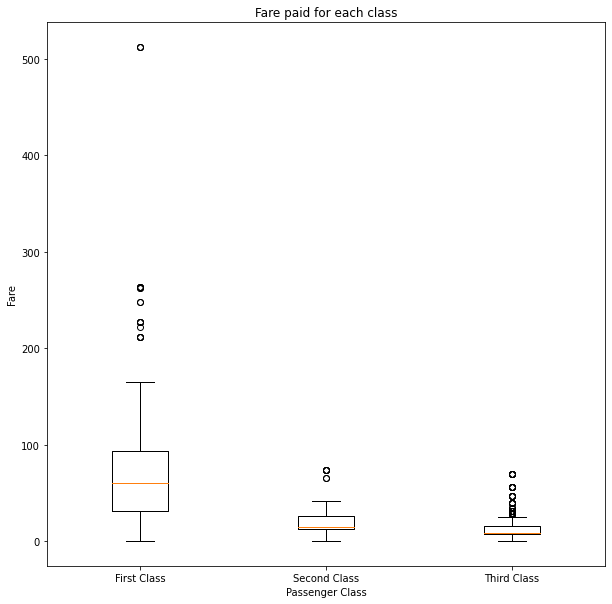

In [27]:
# Boxplot
fig, ax = plt.subplots(figsize=(10, 10))
classes = ["First Class", "Second Class", "Third Class"]
data_for_plotting = []

for i in range(3):
    subset = titanic[titanic["Pclass"] == i + 1]
    data_for_plotting.append(subset["Fare"])

ax.boxplot(data_for_plotting)
ax.set_ylabel("Fare")
ax.set_title("Fare paid for each class")
ax.set_xlabel("Passenger Class")
ax.set_xticks(range(1, 4))
ax.set_xticklabels(classes)

plt.show()

In [21]:
# What percentage of first class passengers survived?
titanic.groupby(by="Pclass").mean()

# 0.629630

,Survived,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
Pclass,,,,,
1,0.629630,38.788981,0.416667,0.356481,84.154687
2,0.472826,29.868641,0.402174,0.380435,20.662183
3,0.244353,25.188747,0.620123,0.396304,13.707707


In [23]:
# What percentage of passengers who paid under £10 fro their ticket survived?
titanic[titanic["Fare"] < 10].describe()


,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,0.201201,2.945946,27.780541,0.081081,0.030030,7.511948
std,0.401501,0.295687,10.384675,0.359094,0.203136,1.765869
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,21.000000,0.000000,0.000000,7.312500
50%,0.000000,3.000000,25.000000,0.000000,0.000000,7.854200
75%,0.000000,3.000000,32.000000,0.000000,0.000000,8.050000
max,1.000000,3.000000,74.000000,4.000000,2.000000,9.845800


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


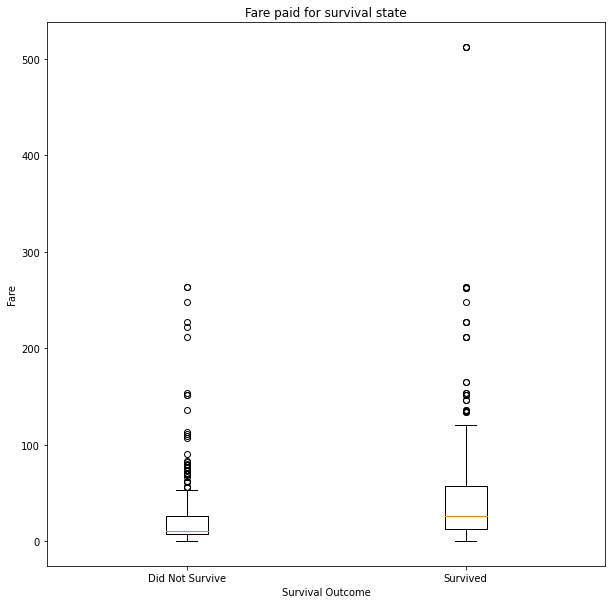

In [26]:
# Boxplot 2
fig, ax = plt.subplots(figsize=(10, 10))
classes = ["Did Not Survive", "Survived"]
data_for_plotting = []

for i in range(2):
    subset = titanic[titanic["Survived"] == i]
    data_for_plotting.append(subset["Fare"])

ax.boxplot(data_for_plotting)
ax.set_ylabel("Fare")
ax.set_title("Fare paid for survival state")
ax.set_xlabel("Survival Outcome")
ax.set_xticks(range(1,3))
ax.set_xticklabels(classes)

plt.show()

In [32]:
# Statistical test
survived = titanic[titanic['Survived'] == 1]["Fare"]
not_survived = titanic[titanic['Survived'] == 0]["Fare"]

# Shapiro for normality
print("Shapiro test for survived", stats.shapiro(survived))
print("Shapiro test for non-survived", stats.shapiro(not_survived))

Shapiro test for survived (0.5967270135879517, 1.8337420335182354e-27)
Shapiro test for non-survived (0.5145274996757507, 4.564138422006922e-36)


In [33]:
# Data is not normally distributed. Use Mann Whitney
stats.mannwhitneyu(survived, not_survived)

# Significant difference 

MannwhitneyuResult(statistic=57578.0, pvalue=4.307135455293686e-22)

# Women and Children First!

In [41]:
# What percentage of women and children survived?
wom_cld = titanic[(titanic['Age'] < 18) | (titanic['Sex'] == 'female')]
wom_cld.describe()

# 67.7%

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,0.677165,2.257218,24.466325,0.892388,0.716535,41.816263
std,0.468175,0.841040,14.635637,1.409169,0.996554,54.137217
min,0.000000,1.000000,0.420000,0.000000,0.000000,6.750000
25%,0.000000,1.000000,16.000000,0.000000,0.000000,11.241700
50%,1.000000,3.000000,23.000000,0.000000,0.000000,23.000000
75%,1.000000,3.000000,34.000000,1.000000,1.000000,46.900000
max,1.000000,3.000000,63.000000,8.000000,6.000000,512.329200


In [42]:
men = titanic[(titanic['Age'] >= 18) & (titanic['Sex'] == 'male')]
men.describe()

# 16.6%

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.166008,2.341897,33.240119,0.249012,0.132411,25.144094
std,0.372456,0.832332,12.472987,0.684517,0.499759,44.977410
min,0.000000,1.000000,18.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,23.000000,0.000000,0.000000,7.854200
50%,0.000000,3.000000,30.000000,0.000000,0.000000,10.008300
75%,0.000000,3.000000,40.000000,0.000000,0.000000,26.550000
max,1.000000,3.000000,80.000000,8.000000,5.000000,512.329200


In [44]:
# Crosstab hack

def is_woman_or_child_map(row):
    if row['Age'] < 18 or row['Sex'] == 'female':
        return 1
    else:
        return 0

titanic["is_woman_or_child"] = titanic.apply(is_woman_or_child_map, axis=1)

In [51]:
cross_tab = pd.crosstab(index=titanic['Survived'], columns=titanic['is_woman_or_child'])
cross_tab

is_woman_or_child,0,1
Survived,,
0,422,123
1,84,258


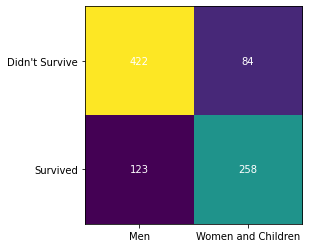

In [56]:
# implot
fig, ax = plt.subplots()

x = ["Men", "Women and Children"]
y = ["Didn't Survive", "Survived"]

ax.set_xticks(np.arange(2))
ax.set_yticks(np.arange(2))

ax.set_xticklabels(x)
ax.set_yticklabels(y)

for i in np.arange(2):
    for j in np.arange(2):
        ax.text(i, j, cross_tab.values[i, j], ha="center", va="center", color="w")

ax.imshow(cross_tab.values)

In [57]:
stats.chi2_contingency(cross_tab.values)

# P-values is second value
# there is correlation.

(237.55707037653542,
 1.3408628628930934e-53,
 1,
 array([[310.90191657, 234.09808343],
        [195.09808343, 146.90191657]]))